In [195]:
using CSV
using Dates
using Plots
using DataFrames

In [200]:
data = CSV.read(joinpath("data", "p175.csv"))
select!(data, Not(:Job))
dropmissing!(data)

1115×15 DataFrame. Omitted printing of 11 columns
│ Row  │ User               │ Project │ Host Name    │ Partition       │
│      │ String             │ String  │ String       │ String          │
├──────┼────────────────────┼─────────┼──────────────┼─────────────────┤
│ 1    │ Pseudo User, cctbx │ lcls    │ cori haswell │ resv            │
│ 2    │ Pseudo User, cctbx │ lcls    │ cori haswell │ resv            │
│ 3    │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 4    │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 5    │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 6    │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 7    │ Pseudo User, cctbx │ lcls    │ cori haswell │ regular_hsw     │
│ 8    │ Pseudo User, cctbx │ lcls    │ cori haswell │ regular_hsw     │
│ 9    │ Pseudo User, cctbx │ lcls    │ cori haswell │ regular_hsw     │
│ 10   │ Pseudo User, cctbx │ lcls    │ cori haswell │ regular_hsw     │
⋮
│ 1105 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 1106 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 1107 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 1108 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 1109 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 1110 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 1111 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 1112 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 1113 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 1114 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │
│ 1115 │ Pseudo User, cctbx │ lcls    │ cori haswell │ realtime_shared │

In [180]:
milliseconds(x::String) = DateTime(x, "yyyy-mm-dd HH:MM:SS").instant.periods.value
milliseconds(data::Array{String}) = map((x)->milliseconds(x), data)

milliseconds (generic function with 3 methods)

In [207]:
start_s = Int64(minimum(milliseconds(data.Start))//1000)
end_s   = Int64(maximum(milliseconds(data.End))//1000)

compute = zeros(Int64, end_s - start_s)
for row in eachrow(data)
    start_job = Int64(milliseconds(row.Start)//1000) - start_s + 1
    end_job   = Int64(milliseconds(row.End)//1000) - start_s

    n_cpus    = Int64(row.CPUs)
    for sec = start_job:end_job
        compute[sec] += n_cpus
    end
end

In [235]:
moving_average(vs,n) = [sum(@view vs[i:(i+n-1)])/n for i in 1:(length(vs)-(n-1))]

moving_average (generic function with 1 method)

In [258]:
plot_start = 1
plot_end   = 300000
n_average  = 240

x = [plot_start:plot_end-n_average+1]/60^2
plot(x, moving_average(compute[plot_start:plot_end], n_average), legend=false, linewidth=2)
xlabel!("time [h]")
ylabel!("# cpus")

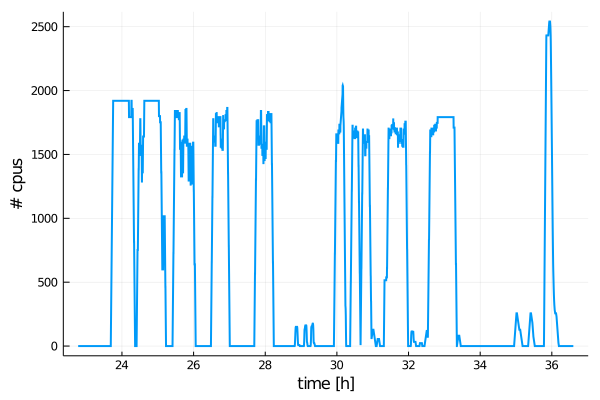

In [259]:
plot_start = 82000
plot_end   = 132000
n_average  = 240

x = [plot_start:plot_end-n_average+1]/60^2
plot(x, moving_average(compute[plot_start:plot_end], n_average), legend=false, linewidth=2)
xlabel!("time [h]")
ylabel!("# cpus")

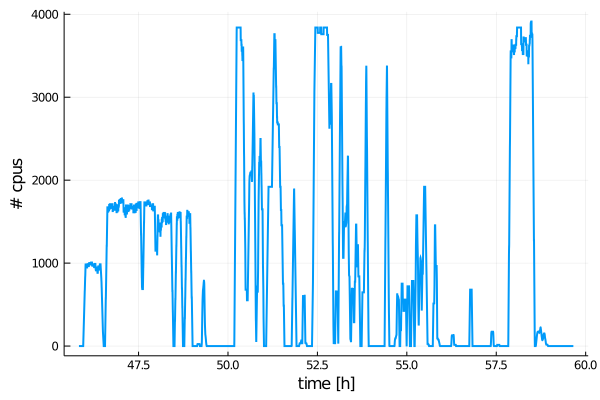

In [260]:
plot_start = 165000
plot_end   = 215000
n_average  = 240

x = [plot_start:plot_end-n_average+1]/60^2
plot(x, moving_average(compute[plot_start:plot_end], n_average), legend=false, linewidth=2)
xlabel!("time [h]")
ylabel!("# cpus")

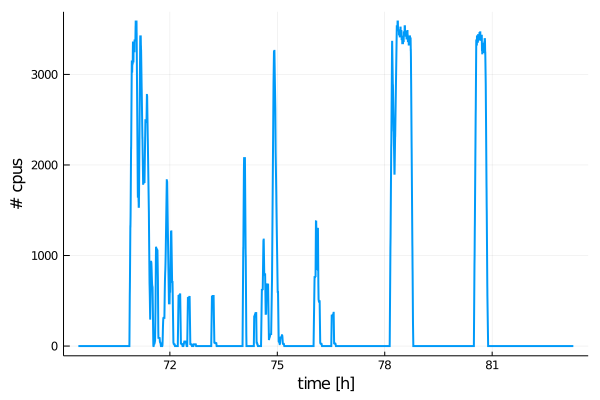

In [261]:
plot_start = 250000
plot_end   = 300000
n_average  = 240

x = [plot_start:plot_end-n_average+1]/60^2
plot(x, moving_average(compute[plot_start:plot_end], n_average), legend=false, linewidth=2)
xlabel!("time [h]")
ylabel!("# cpus")